In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

,exp_time,od_measured,od_setpoint,od_zero_setpoint,thermostat_setpoint,heating_rate,internal_air_temp,external_air_temp,media_temp,opt_gen_act_int,...,FP2_emit2,FP3_base,FP3_emit1,FP3_emit2,custom_prog_param1,custom_prog_param2,custom_prog_param3,custom_prog_status,zigzag_target,growth_rate
0,0.19,0.024567,0.5,6897.0,31.0,1.00000,24.5625,32.7500,24.87,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
1,60.25,0.029270,0.5,6897.0,31.0,1.00000,24.8750,32.7500,25.61,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2,120.31,0.031709,0.5,6897.0,31.0,1.00000,25.5625,32.8125,27.79,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
3,180.37,0.025915,0.5,6897.0,31.0,0.32065,26.5000,32.7500,30.11,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
4,240.43,0.026720,0.5,6897.0,31.0,0.07995,27.2500,32.6875,30.93,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


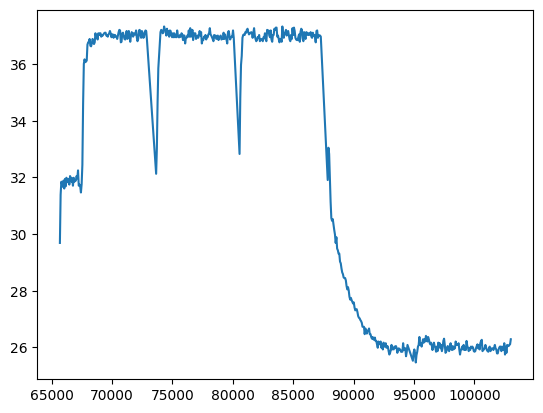

In [2]:

sampcycle = [1049, 1170, 1278, 1391, 1502, 1638]
ec31 = pd.read_csv('../../../ProjectData/Chibio_Modelling/Data/23-10-07 data 062_4/2023-10-07 20_22_24_M0_data.csv')
C8M0 = pd.read_csv('../../Ting/Experiments/061-2/2023-09-07 16_28_56_M0_data.csv')
FC_file = pd.read_excel('../../Ting/Experiments/061-2/230915 Facility Analysis Manual Count.xlsx',header=[1])
FC_data = FC_file['% Parent.1'] + FC_file['% Parent.2']
C8M0_FCEc = FC_data[1:-1:7]
C8M0hrs = C8M0["exp_time"][sampcycle[0]:sampcycle[-1]].to_numpy()/3600
sim_h = C8M0hrs[-1]-C8M0hrs[0]
plt.plot(C8M0["exp_time"][1049:1638],C8M0["media_temp"][1049:1638])
ec31.head()

# C8M0hrs = C8M0["exp_time"][sampcycle[0]:sampcycle[-1]]/3600
# C8M0hrs = C8M0hrs.to_numpy()
# C8M0od = C8M0["od_measured"][sampcycle[0]:sampcycle[-1]]
# C8M0tem = C8M0["media_temp"][sampcycle[0]:sampcycle[-1]]
# sim_h = C8M0hrs[-1]-C8M0hrs[0]
# data_l = int(sim_h*3600/10)
# time_arr = np.arange(0,sim_h,10/3600)
# C8M0tem[C8M0hrs>time_arr]

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1r = ax1.twinx()
ax2r = ax2.twinx()

ax1.plot(time_arr,e_coli_percent, 'b', label = 'e coli. sim')
ax1.plot(time_arr,p_puti_percent, 'g', label = 'p. putida sim')
ax1.plot(C8M2hrs[sampcycle-sampcycle[0]],C8M2_FCEc, 'bx', label = 'e coli. fc')
ax1.plot(C8M2hrs[sampcycle-sampcycle[0]],100-C8M2_FCEc, 'gx', label = 'p. putida fc')
ax1r.plot(time_arr,T,'--r')

ax1.legend()
ax1.set_ylabel("Relative composition [%]")
ax1r.tick_params('y', color='r', labelright=False)
ax2r.sharey(ax1r)
ax2r.tick_params(axis='y', color='r', labelcolor='r')
ax2r.set_ylabel('Temperature [°C]', color='r')
plt.xlabel("Time [h]")
plt.savefig("Images/cocultureComp.png")
plt.show()

In [33]:
def f(xy):
   x, y = xy
   z = np.array([y - x**2, y - x - 1.0])
   return z

fsolve(f, [1.0, 2.0])

array([1.61803399, 2.61803399])